In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [2]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [29]:
import pandas as pd
data=pd.read_csv('h1.csv',header=0,usecols=[4])
dataset=data['cpu_usage_percentage']
dataset=np.array(dataset)
n_steps =10
X, y = prepare_data(dataset, n_steps)
print(X)
print(y)

[[93.23333333 93.05       89.15       ... 86.78333333 89.51666667
  95.08333333]
 [93.05       89.15       90.05       ... 89.51666667 95.08333333
  94.25      ]
 [89.15       90.05       93.56666667 ... 95.08333333 94.25
  55.41666667]
 ...
 [ 0.63333333  0.56666667  1.43333333 ...  0.66666667  0.71666667
   0.7       ]
 [ 0.56666667  1.43333333  0.7        ...  0.71666667  0.7
   0.65      ]
 [ 1.43333333  0.7         0.7        ...  0.7         0.65
   0.73333333]]
[94.25       55.41666667  0.73333333 ...  0.65        0.73333333
  0.71666667]


In [30]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features=1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(8624, 10, 1)

In [31]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)

In [34]:
x_input = np.array([1.4333333333333333,0.7,0.7,0.75,0.7333333333333333,0.6666666666666667,0.7166666666666667,0.7,0.65,0.7333333333333333,0.7166666666666667])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<100):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

#print(lst_output)

0 day input [0.7        0.7        0.75       0.73333333 0.66666667 0.71666667
 0.7        0.65       0.73333333 0.71666667]
0 day output [[0.48611093]]
1 day input [0.7        0.75       0.73333333 0.66666667 0.71666667 0.7
 0.65       0.73333333 0.71666667 0.48611093]
1 day output [[0.5905533]]
2 day input [0.75       0.73333333 0.66666667 0.71666667 0.7        0.65
 0.73333333 0.71666667 0.48611093 0.59055328]
2 day output [[0.89951193]]
3 day input [0.73333333 0.66666667 0.71666667 0.7        0.65       0.73333333
 0.71666667 0.48611093 0.59055328 0.89951193]
3 day output [[0.54613316]]
4 day input [0.66666667 0.71666667 0.7        0.65       0.73333333 0.71666667
 0.48611093 0.59055328 0.89951193 0.54613316]
4 day output [[0.5518451]]
5 day input [0.71666667 0.7        0.65       0.73333333 0.71666667 0.48611093
 0.59055328 0.89951193 0.54613316 0.55184507]
5 day output [[0.65119493]]
6 day input [0.7        0.65       0.73333333 0.71666667 0.48611093 0.59055328
 0.89951193 0.5461

53 day output [[0.7095927]]
54 day input [0.75029945 0.70972484 0.74991274 0.71117556 0.75402534 0.7080486
 0.7494036  0.71089935 0.7520595  0.7095927 ]
54 day output [[0.752121]]
55 day input [0.70972484 0.74991274 0.71117556 0.75402534 0.7080486  0.7494036
 0.71089935 0.7520595  0.7095927  0.752121  ]
55 day output [[0.70921075]]
56 day input [0.74991274 0.71117556 0.75402534 0.7080486  0.7494036  0.71089935
 0.7520595  0.7095927  0.752121   0.70921075]
56 day output [[0.7501476]]
57 day input [0.71117556 0.75402534 0.7080486  0.7494036  0.71089935 0.7520595
 0.7095927  0.752121   0.70921075 0.7501476 ]
57 day output [[0.7106168]]
58 day input [0.75402534 0.7080486  0.7494036  0.71089935 0.7520595  0.7095927
 0.752121   0.70921075 0.7501476  0.7106168 ]
58 day output [[0.7525439]]
59 day input [0.7080486  0.7494036  0.71089935 0.7520595  0.7095927  0.752121
 0.70921075 0.7501476  0.7106168  0.7525439 ]
59 day output [[0.7091459]]
60 day input [0.7494036  0.71089935 0.7520595  0.70959

In [35]:
import matplotlib.pyplot as plt

In [39]:
day_new=np.arange(1,8635)
day_pred=np.arange(8635,8735)

In [40]:
print(day_pred)
print(lst_output)

[8635 8636 8637 8638 8639 8640 8641 8642 8643 8644 8645 8646 8647 8648
 8649 8650 8651 8652 8653 8654 8655 8656 8657 8658 8659 8660 8661 8662
 8663 8664 8665 8666 8667 8668 8669 8670 8671 8672 8673 8674 8675 8676
 8677 8678 8679 8680 8681 8682 8683 8684 8685 8686 8687 8688 8689 8690
 8691 8692 8693 8694 8695 8696 8697 8698 8699 8700 8701 8702 8703 8704
 8705 8706 8707 8708 8709 8710 8711 8712 8713 8714 8715 8716 8717 8718
 8719 8720 8721 8722 8723 8724 8725 8726 8727 8728 8729 8730 8731 8732
 8733 8734]
[0.48611093, 0.5905533, 0.89951193, 0.54613316, 0.5518451, 0.65119493, 0.69113404, 0.6821551, 0.7692486, 0.63300574, 0.57655126, 0.62907416, 0.7929714, 0.65610343, 0.672758, 0.70715904, 0.74920356, 0.7037247, 0.7677965, 0.6927995, 0.6983025, 0.70623785, 0.7848111, 0.6898471, 0.720029, 0.7150171, 0.75878215, 0.71102387, 0.75934166, 0.70349956, 0.73491406, 0.7147968, 0.76435626, 0.7024652, 0.7422737, 0.7118591, 0.75217557, 0.7114132, 0.75606376, 0.7062018, 0.7454057, 0.7128706, 0.75536215

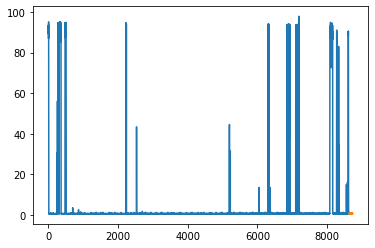

In [38]:
plt.plot(day_new,dataset)
plt.plot(day_pred,lst_output)